In [1]:
import time
import numpy as np
import numba
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
@numba.njit
def benchmarker(y, a, b, x):
    for i in range(y.shape[0]):
        y[i] = a[i]*x[i] + b[i]

@numba.njit
def make_data(N):
    a,b,x = np.random.random((3,N))
    y = np.zeros(N)
    return a,b,x,y

def memory_bandwidth(N):
    times = []
    a, b, x, y = make_data(N)
    for _ in range(5):
        main_time = 0
        niters = 0
        while (main_time < 0.1):
            t = time.perf_counter()
            benchmarker(y, a, b, x)
            t = time.perf_counter() - t
            niters += 1
            main_time += t
        times.append((main_time, niters))
    t = min(times)        
    mem_bw = (N * t[1] * 8 * 4)/t[0]
    return mem_bw

In [3]:
nvals = np.array([10, 50, 60, 70, 80, 90, 100, 500, 600, 700, 800, 900, 1000, 5000, 6000, 7000, 8000, 9000, 10000, 
                  50000, 60000, 70000, 80000, 90000, 100000, 300000, 500000, 600000, 700000, 800000, 900000, 1000000,
                  3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000,
                  10000000, 50000000, 60000000, 70000000, 80000000, 90000000, 100000000], dtype=np.int64)
memory_bandwidths = []

# dummy calls to warm up numba
a,b,x,y = make_data(100)
benchmarker(y,a,b,x)

# benchmarking memory bandwidth for various values of nvals
for i in tqdm(range(nvals.shape[0])):
    memory_bandwidths.append(memory_bandwidth(nvals[i]))

memory_bandwidths = np.array(memory_bandwidths)

print("Values of N:", nvals)
print("Memory Bandwidth Obtained:", memory_bandwidths)

100%|██████████| 46/46 [00:39<00:00,  1.17it/s]

Values of N: [       10        50        60        70        80        90       100
       500       600       700       800       900      1000      5000
      6000      7000      8000      9000     10000     50000     60000
     70000     80000     90000    100000    300000    500000    600000
    700000    800000    900000   1000000   3000000   4000000   5000000
   6000000   7000000   8000000   9000000  10000000  50000000  60000000
  70000000  80000000  90000000 100000000]
Memory Bandwidth Obtained: [4.29759140e+08 2.01591799e+09 2.40933120e+09 3.00737619e+09
 3.39611481e+09 3.88305967e+09 4.01861195e+09 1.84430400e+10
 2.13517226e+10 2.32220800e+10 2.65552858e+10 2.82534662e+10
 2.76780523e+10 6.99421202e+10 7.53770539e+10 7.32609271e+10
 6.87557924e+10 6.57125000e+10 6.17214766e+10 6.55028210e+10
 5.75591825e+10 6.27628543e+10 6.45021957e+10 6.36377543e+10
 5.80074149e+10 5.23647872e+10 2.74947598e+10 2.68066303e+10
 2.63960222e+10 2.35255573e+10 2.25927213e+10 2.23406186e+10
 2.0

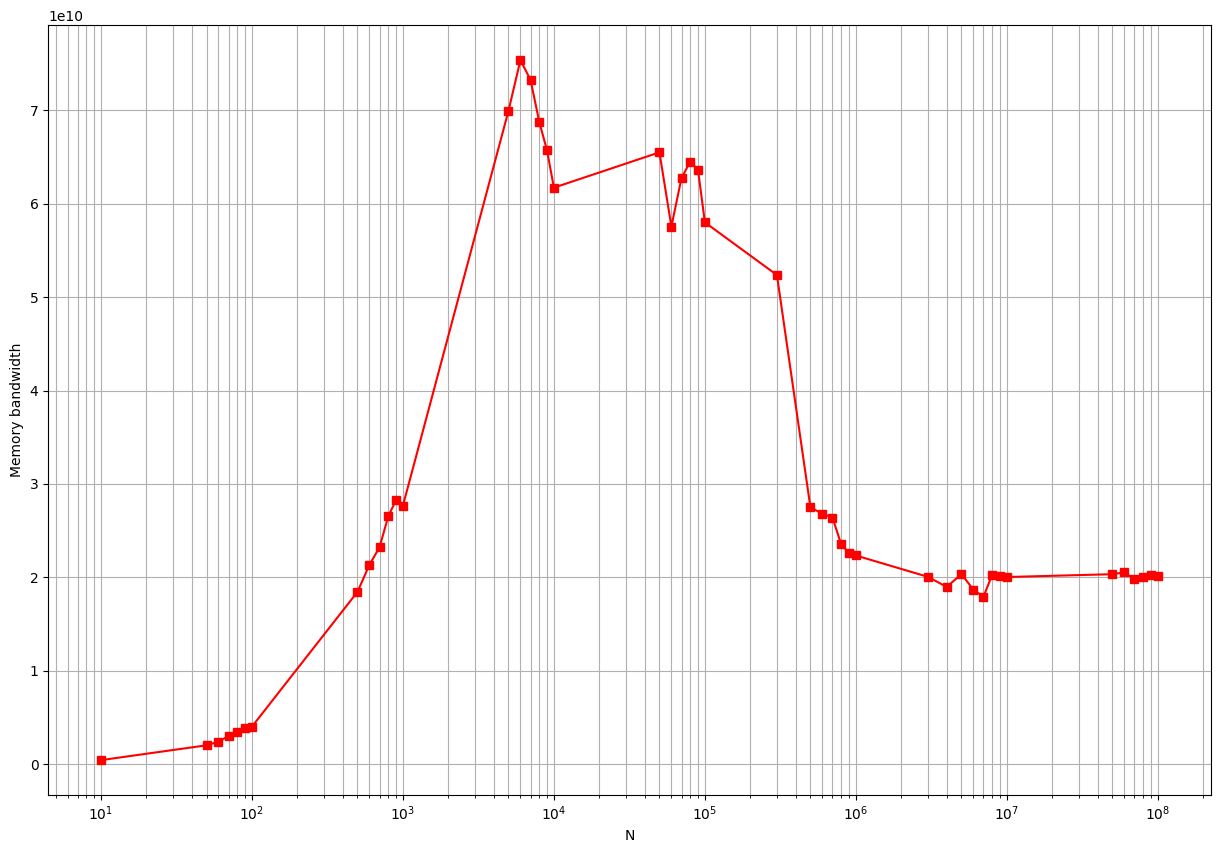

In [4]:
plt.rcParams["figure.figsize"] = (15,10)
plt.semilogx(nvals, memory_bandwidths, 'rs-')
plt.xlabel("N")
plt.ylabel("Memory bandwidth")
plt.grid(True, which='both', ls='-')
plt.show()